<a href="https://colab.research.google.com/github/codernayeem/dl-practice/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [5]:
def plot_img(index, col=5, single_plot_size=(2, 2)):
    n = len(index)
    if n < col:
        col = n
    row = n // col + 1
    plt.figure(figsize=(single_plot_size[0]*col, single_plot_size[1]*row))
    plt.gray()
    for i, ii in enumerate(index):
        plt.subplot(row, col, i+1)
        plt.imshow(X_train[ii], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[ii])
    plt.show()

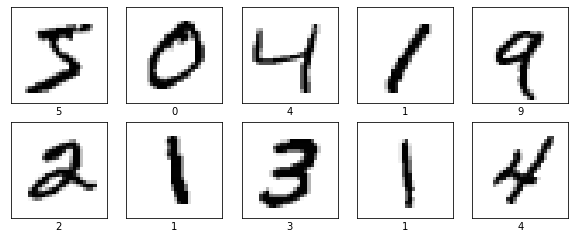

In [6]:
plot_img(range(10))

In [7]:
X_train, X_test = X_train / 255, X_test / 255

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    # keras.layers.Dropout(0.20),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3023 - accuracy: 0.9149
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1485 - accuracy: 0.9567
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9684
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9744
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0703 - accuracy: 0.9782
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9827
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0371 - accuracy: 0.9888
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.032

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1029 - accuracy: 0.9752


[0.10291311889886856, 0.9751999974250793]

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [12]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[5.12599945e-04, 1.68308725e-06, 2.36248076e-02, 9.13266540e-01,
        4.57142553e-11, 1.16175413e-03, 2.04291065e-13, 9.99995768e-01,
        4.79495525e-03, 1.14397794e-01],
       [7.52957225e-01, 5.51164925e-01, 1.00000000e+00, 9.84735012e-01,
        1.25571528e-18, 2.13199854e-02, 2.95341015e-04, 6.08867696e-15,
        6.77540898e-03, 8.38690895e-09],
       [2.53379903e-06, 9.96755481e-01, 1.51705742e-03, 6.81574602e-05,
        3.03167105e-03, 4.61459160e-04, 8.65638256e-04, 2.52059102e-03,
        5.53908944e-03, 2.07900830e-05],
       [9.99999464e-01, 6.80357218e-04, 9.48177934e-01, 1.27787507e-05,
        5.20201826e-10, 3.08877230e-03, 6.77654147e-03, 2.43085623e-03,
        1.03229149e-06, 7.39796678e-06],
       [3.59624624e-04, 3.37032235e-10, 2.53713727e-02, 5.97472672e-06,
        9.99993086e-01, 1.79290771e-04, 7.80773163e-03, 1.12511605e-01,
        1.36703253e-04, 9.82444823e-01]], dtype=float32)

In [13]:
y_pred_actual = np.array([], dtype=int)
for i in y_pred:
    y_pred_actual = np.append(y_pred_actual, np.argmax(i))
y_pred_actual[:5]

array([7, 2, 1, 0, 4])

In [14]:
print(classification_report(y_test, y_pred_actual))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



In [15]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

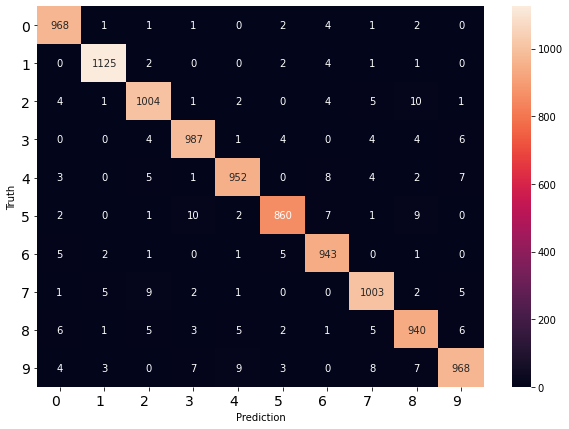

In [16]:
cm = confusion_matrix(y_test, y_pred_actual)
print_confusion_matrix(cm, range(10))

In [17]:
do_not_match_index = []
for i in range(len(y_test)):
   if y_test[i] != y_pred_actual[i]:
      do_not_match_index.append(i)
do_not_match_index[:5]

[61, 149, 247, 259, 321]

In [18]:
def plot_test_img(index, col=5, single_plot_size=(2, 2)):
    n = len(index)
    if n < col:
        col = n
    row = n // col + 1
    plt.figure(figsize=(single_plot_size[0]*col, single_plot_size[1]*row))
    plt.gray()
    for i, ii in enumerate(index):
        plt.subplot(row, col, i+1)
        plt.imshow(X_test[ii], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(f'Truth: {y_test[ii]}')
        plt.xlabel(f'Prediction: {y_pred_actual[ii]}')
    plt.show()

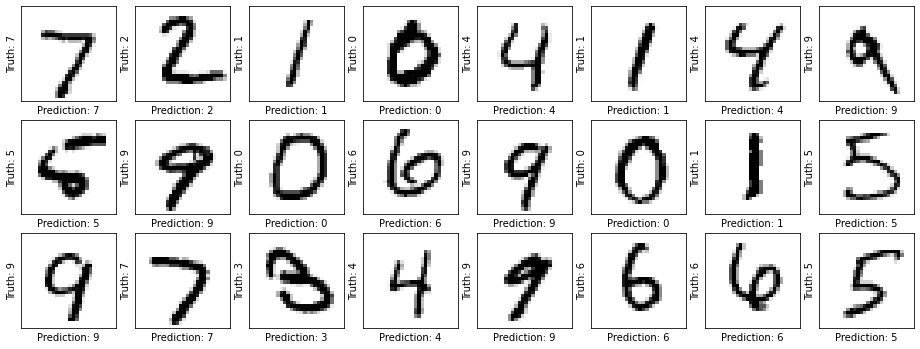

In [19]:
plot_test_img(range(24), col=8)


In [20]:
len(do_not_match_index)

250

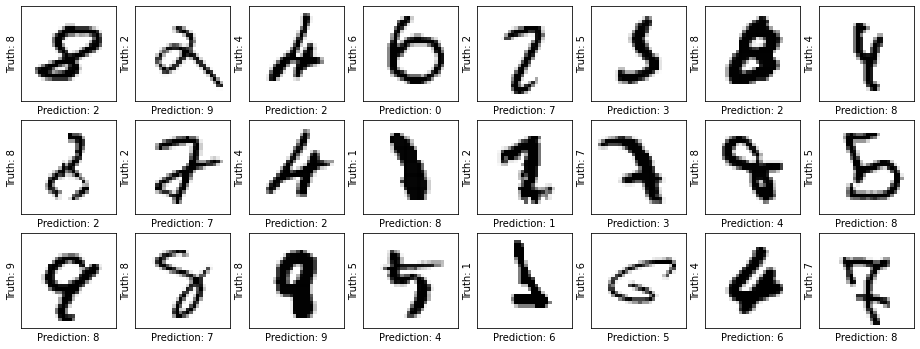

In [21]:
plot_test_img(do_not_match_index[:24], col=8)